<a href="https://colab.research.google.com/github/Ensyllis/Notes-and-Projects/blob/main/Stochastic_Occilations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
pip install pandas_ta

In [ ]:
import yfinance as yf
import datetime as dt

In [ ]:
import pandas_ta as ta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [ ]:
# get historical pricing data
df = yf.Ticker('SPY')
df = df.history(period='6mo')[['Open', 'High', 'Low', 'Close']]
df

,Open,High,Low,Close
Date,,,,
2022-04-11 00:00:00-04:00,440.390784,441.273345,435.710341,436.235901
2022-04-12 00:00:00-04:00,439.369371,442.017024,432.993227,434.619507
2022-04-13 00:00:00-04:00,434.361692,440.390761,434.173281,439.597473
2022-04-14 00:00:00-04:00,439.835460,441.005601,434.014624,434.123718
2022-04-18 00:00:00-04:00,433.151896,436.067277,431.961933,434.302185
...,...,...,...,...
2022-10-04 00:00:00-04:00,372.399994,378.000000,366.570007,377.970001
2022-10-05 00:00:00-04:00,373.390015,379.459991,370.950012,377.089996
2022-10-06 00:00:00-04:00,375.619995,378.720001,372.679993,373.200012


In [ ]:
k_period = 14
d_period = 3
# Adds a "n_high" column with max value of previous 14 periods
df['n_high'] = df['High'].rolling(k_period).max()
# Adds an "n_low" column with min value of previous 14 periods
df['n_low'] = df['Low'].rolling(k_period).min()
# Uses the min/max values to calculate the %k (as a percentage)
df['%K'] = (df['Close'] - df['n_low']) * 100 / (df['n_high'] - df['n_low'])
# Uses the %k to calculates a SMA over the past 3 values of %k
df['%D'] = df['%K'].rolling(d_period).mean()

In [ ]:
df.ta.stoch(high='high', low='low', k=14, d=3, append=True)

,STOCHk_14_3_3,STOCHd_14_3_3
Date,,
2022-04-29 00:00:00-04:00,NaN,NaN
2022-05-02 00:00:00-04:00,NaN,NaN
2022-05-03 00:00:00-04:00,16.104373,NaN
2022-05-04 00:00:00-04:00,33.237026,NaN
2022-05-05 00:00:00-04:00,32.740613,27.360670
...,...,...
2022-10-04 00:00:00-04:00,27.306981,15.551522
2022-10-05 00:00:00-04:00,47.912578,28.622753
2022-10-06 00:00:00-04:00,56.107301,43.775620


In [ ]:
df

,Open,High,Low,Close,n_high,n_low,%K,%D,STOCHk_14_3_3,STOCHd_14_3_3
Date,,,,,,,,,,
2022-04-01,100.217505,101.328634,98.742562,99.578362,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-04,100.099519,101.033647,98.427912,99.057220,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-05,99.371870,101.525290,98.949053,99.765190,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-06,100.984472,103.010066,98.762229,101.574455,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-07,101.780944,102.675739,98.781889,101.603951,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,99.430000,101.629997,97.730003,97.889999,116.290001,97.730003,0.862048,16.541525,16.541525,26.102897
2022-09-27,100.110001,102.830002,99.300003,101.169998,116.290001,97.730003,18.534457,8.477859,8.477859,16.998289
2022-09-28,101.169998,109.239998,101.010002,108.800003,116.290001,97.730003,59.644403,26.346969,26.346969,17.122118


In [ ]:
def implement_stoch_strategy(prices, k, d):    
    buy_price = []
    sell_price = []
    stoch_signal = []
    signal = 0

    for i in range(len(prices)):
        if k[i] < 20 and d[i] < 20 and k[i] < d[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                stoch_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                stoch_signal.append(0)
        elif k[i] > 80 and d[i] > 80 and k[i] > d[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                stoch_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                stoch_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            stoch_signal.append(0)
            
    return buy_price, sell_price, stoch_signal
            
buy_price, sell_price, stoch_signal = implement_stoch_strategy(df['Close'], df['%K'], df['%D'])

In [ ]:
print(stoch_signal)
print(buy_price)
print(sell_price)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 111.46477508544922, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 111.93000030517578, nan, nan, nan, nan, nan, nan, nan, nan

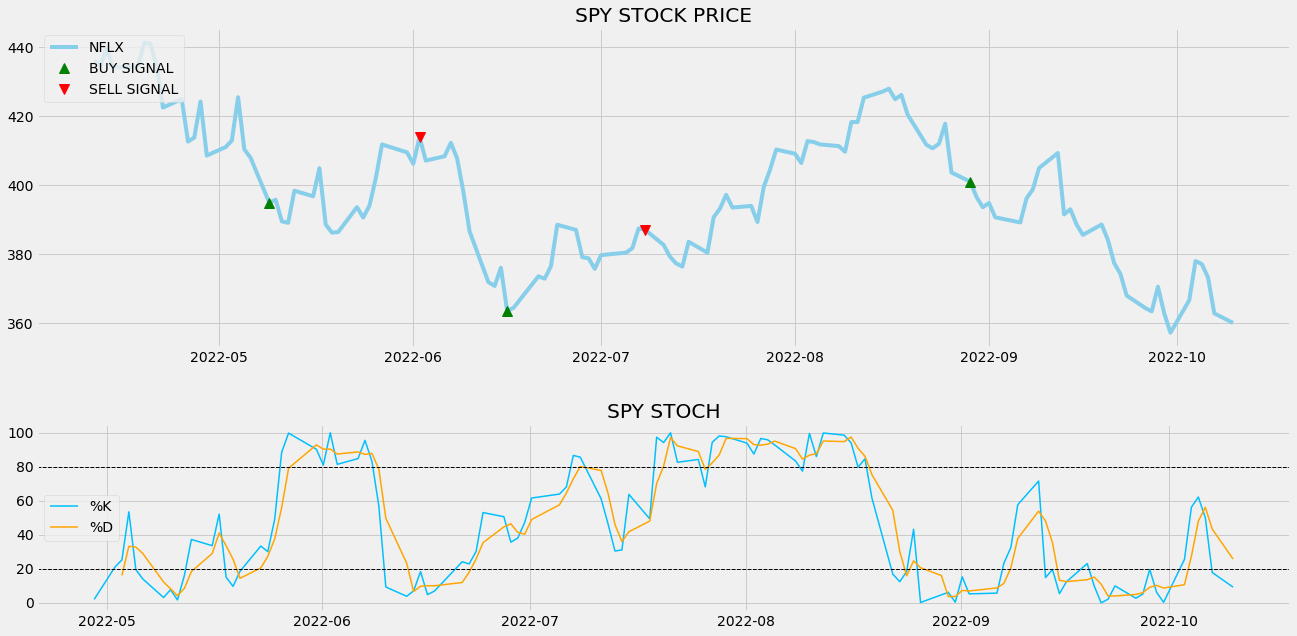

In [ ]:
ax1 = plt.subplot2grid((9, 1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((9, 1), (6,0), rowspan = 3, colspan = 1)
ax1.plot(df['Close'], color = 'skyblue', label = 'NFLX')
ax1.plot(df.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(df.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend(loc = 'upper left')
ax1.set_title('SPY STOCK PRICE')
ax2.plot(df['%K'], color = 'deepskyblue', linewidth = 1.5, label = '%K')
ax2.plot(df['%D'], color = 'orange', linewidth = 1.5, label = '%D')
ax2.axhline(80, color = 'black', linewidth = 1, linestyle = '--')
ax2.axhline(20, color = 'black', linewidth = 1, linestyle = '--')
ax2.set_title('SPY STOCH')
ax2.legend()
plt.show()

In [ ]:
position = []
for i in range(len(stoch_signal)):
    if stoch_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(df['Close'])):
    if stoch_signal[i] == 1:
        position[i] = 1
    elif stoch_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]

k = df['%K']
d = df['%D']
close_price = df['Close']
stoch_signal = pd.DataFrame(stoch_signal).rename(columns = {0:'stoch_signal'}).set_index(df.index)
position = pd.DataFrame(position).rename(columns = {0:'stoch_position'}).set_index(df.index)

frames = [close_price, k, d, stoch_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy.tail()

,Close,%K,%D,stoch_signal,stoch_position
Date,,,,,
2022-09-26,97.889999,0.862048,16.541525,0,1
2022-09-27,101.169998,18.534457,8.477859,0,1
2022-09-28,108.800003,59.644403,26.346969,0,1
2022-09-29,107.239998,51.239201,43.139354,0,1
2022-09-30,106.849998,52.323551,54.402385,0,1


In [ ]:
from math import floor
from termcolor import colored as cl

In [ ]:
nflx_ret = pd.DataFrame(np.diff(df['Close'])).rename(columns = {0:'returns'})
stoch_strategy_ret = []

for i in range(len(nflx_ret)):
    try:
        returns = nflx_ret['returns'][i]*strategy['stoch_position'][i]
        stoch_strategy_ret.append(returns)
    except:
        pass
    
stoch_strategy_ret_df = pd.DataFrame(stoch_strategy_ret).rename(columns = {0:'stoch_returns'})

investment_value = 100000
number_of_stocks = floor(investment_value/df['Close'][-1])
stoch_investment_ret = []

for i in range(len(stoch_strategy_ret_df['stoch_returns'])):
    returns = number_of_stocks*stoch_strategy_ret_df['stoch_returns'][i]
    stoch_investment_ret.append(returns)

stoch_investment_ret_df = pd.DataFrame(stoch_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(stoch_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the STOCH strategy by investing $100k in NVIDIA : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the STOCH strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the STOCH strategy by investing $100k in NVIDIA : 7489.3
Profit percentage of the STOCH strategy : 7%


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Avoid case-sensitive issues for accessing data.
# Optional if using pandas_ta
df.columns = [x.lower() for x in df.columns]
# Create our primary chart
# the rows/cols arguments tell plotly we want two figures
fig = make_subplots(rows=2, cols=1)  
# Create our Candlestick chart with an overlaid price line
fig.append_trace(
    go.Candlestick(
        x=df.index,
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        increasing_line_color='#ff9900',
        decreasing_line_color='black',
        showlegend=False
    ), row=1, col=1  # <------------ upper chart
)
# price Line
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['open'],
        line=dict(color='#ff9900', width=1),
        name='open',
    ), row=1, col=1  # <------------ upper chart
)
# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['stochk_14_3_3'],
        line=dict(color='#ff9900', width=2),
        name='fast',
    ), row=2, col=1  #  <------------ lower chart
)
# Slow signal (%d)
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['stochd_14_3_3'],
        line=dict(color='#000000', width=2),
        name='slow'
    ), row=2, col=1  # <------------ lower chart
)
# Extend our y-axis a bit
fig.update_yaxes(range=[-10, 110], row=2, col=1)
# Add upper/lower bounds
fig.add_hline(y=0, col=1, row=2, line_color="#666", line_width=2)
fig.add_hline(y=100, col=1, row=2, line_color="#666", line_width=2)
# Add overbought/oversold
fig.add_hline(y=20, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
fig.add_hline(y=80, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
fig.update_layout(layout)
# View our chart in the system default HTML viewer (Chrome, Firefox, etc.)
fig.show()

In [ ]:
# Overbought status
if k > 80 and d > 80 and k < d:
    sell
# Oversold status   
else if k < 20 and d < 20 and k > d:
    buy
# Something in the middle
else:
    do nothing

SyntaxError: ignored